<a href="https://colab.research.google.com/github/Franulo/DeepLearningJourney/blob/main/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
xn, yn = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [2]:
import pandas as pd
circles = pd.DataFrame({"x0":xn[:, 0], "x1":xn[:, 1], "label":yn})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


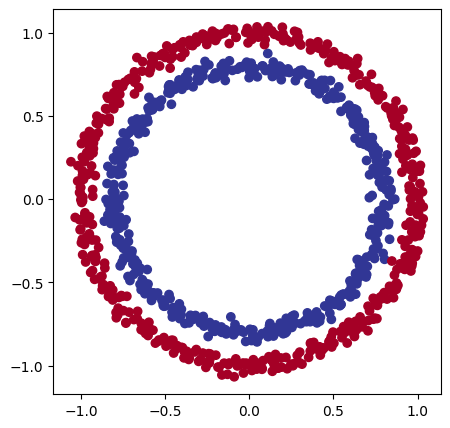

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(xn[:, 0], xn[:, 1], c=yn, cmap=plt.cm.RdYlBu)

## Input and output shape

In [4]:
# Check the shapes of our features and labels
xn.shape, yn.shape

((1000, 2), (1000,))

In [5]:
# How many samples are we working with
len(xn), len(yn)

(1000, 1000)

In [6]:
# View the first examples of features and labels
xn[0], yn[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [7]:
import tensorflow as tf

In [8]:
x = tf.convert_to_tensor(xn)
y = tf.convert_to_tensor(yn)

In [9]:
x.shape

TensorShape([1000, 2])

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(x, y, epochs=100)

In [11]:
a = model.predict(x)
a.shape

32/32 [==============================] - 0s 1ms/step


(1000, 1)

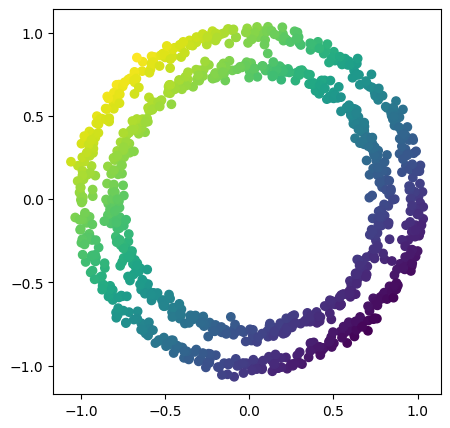

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=a)

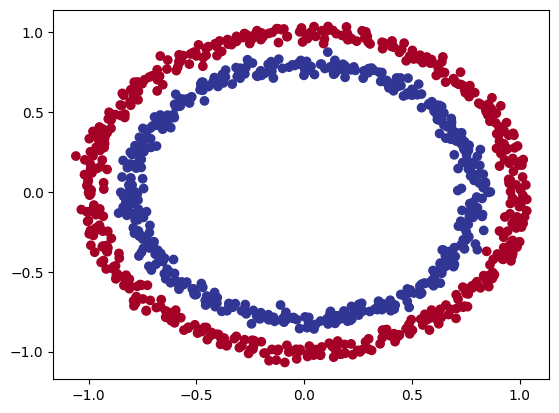

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='RdYlBu')

To visulize our model's predictions, let's ccreate a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np

In [15]:
def plot_decision_boundary(model=model, x=x, y=y):
  x_min, x_max = xn[:, 0].min() - 0.1, xn[:, 0].max() + 0.1
  y_min, y_max = xn[:, 1].min() - 0.1, xn[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()] # stacks 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundrary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


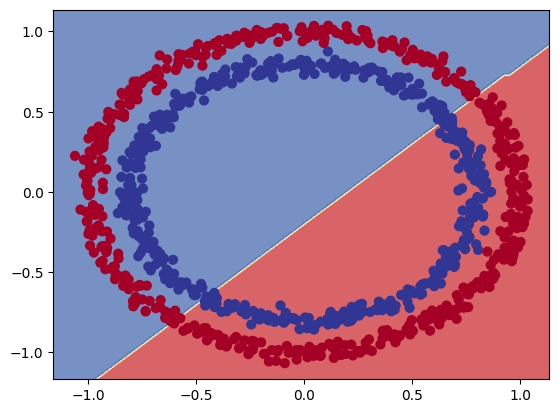

In [16]:
plot_decision_boundary()

## The missing piece: Non-linearity

In [17]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model_1.fit(x, y, epochs=210, verbose=0)

(0.0, 1.0)

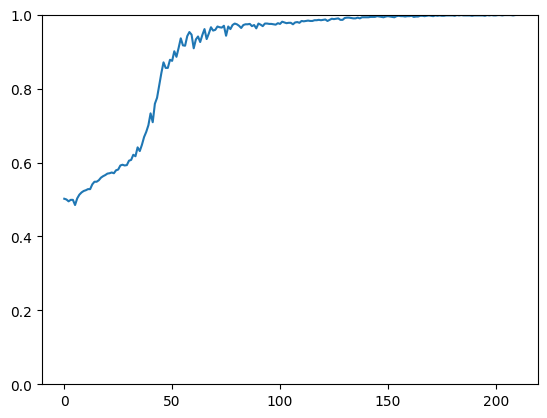

In [18]:
plt.plot(history.history['accuracy'])
plt.ylim([0, 1])

313/313 [==============================] - 0s 1ms/step
doing binary classification


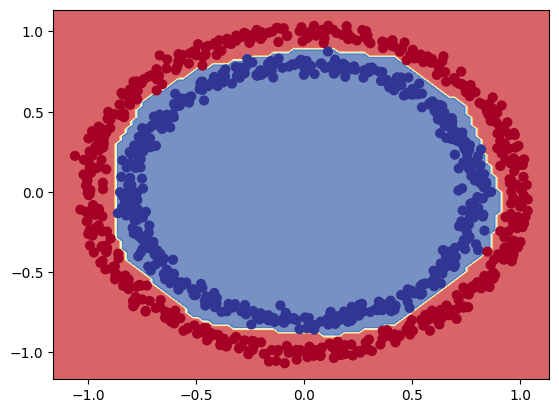

In [19]:
plot_decision_boundary(model=model_1)

In [20]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.9990


[0.26270556449890137, 0.9990000128746033]

In [21]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

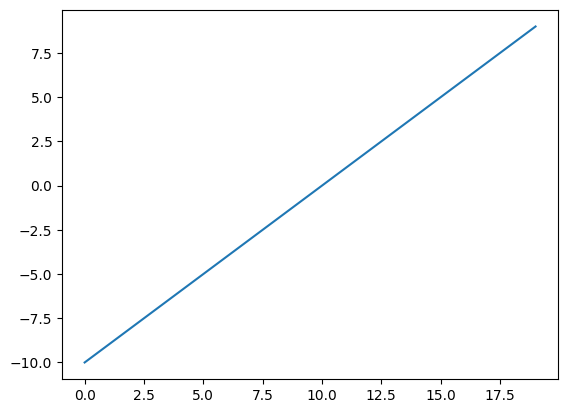

In [22]:
# Visulize out toy tensor
plt.plot(A)

In [23]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1+ exp(-x))
def sigmoid(x):
  return 1 / (1+ tf.exp(-x))

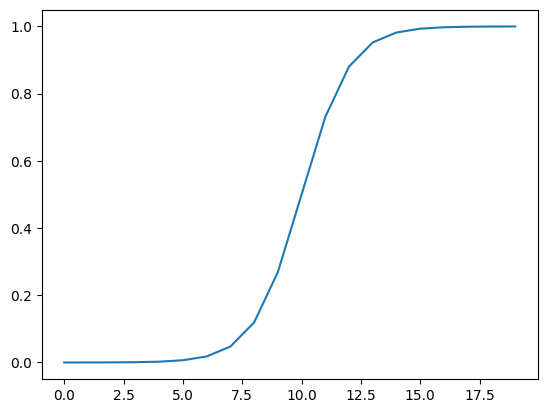

In [24]:
plt.plot(sigmoid(A))

In [25]:
# Let's create the relu function
def relu(x):
  return tf.maximum(0, x)

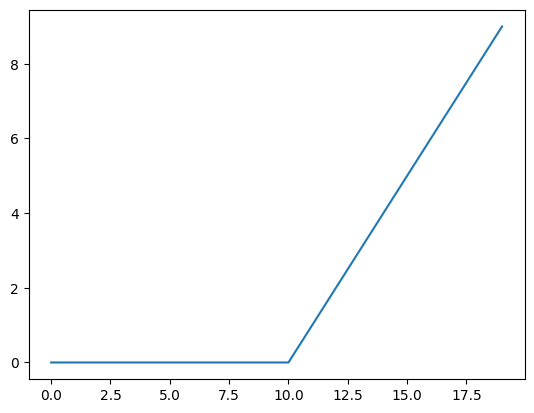

In [26]:
plt.plot(relu(A))

In [27]:
tf.keras.activations.linear(A), tf.keras.activations.sigmoid(A), tf.keras.activations.relu(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
        2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
        8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32)>)

## Evaluating and improving our classificiation

In [28]:
# Check how many examples we have
len(x)

1000

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
x.shape

TensorShape([1000, 2])

In [38]:
x_train, x_test = train_test_split(np.reshape(x, (-1,1)), test_size=0.33, random_state=42)
y_train, y_test = train_test_split(np.reshape(y, (-1,1)), test_size=0.33, random_state=42)